In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('drive/My Drive/07_小狗识别')

#### 导入包

In [3]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.optimizers import SGD, Adam
from keras.utils.vis_utils import plot_model
from keras.preprocessing.image import img_to_array, array_to_img, ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### 训练模型

In [5]:
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

model_top = Sequential()
model_top.add(Flatten(input_shape=model_vgg16.output_shape[1:], name='flatten_0'))
model_top.add(Dense(units=256, activation='relu', name='fc_1'))
model_top.add(Dense(units=10, activation='softmax', name='output_0'))

model = Sequential()
model.add(model_vgg16)
model.add(model_top)

train_datagen = ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=20,zoom_range=0.2,horizontal_flip=True, rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

batch_size = 32
train_generator = train_datagen.flow_from_directory(directory='data/train', target_size=(224,224))
test_generator = test_datagen.flow_from_directory(directory='data/test', target_size=(224,224))

print(train_generator.class_indices)

sgd = SGD(lr=1e-4, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=30, validation_data=test_generator, validation_steps=len(test_generator))
model.save('models/vgg16_dogs_classifier.h5')

## 下面的警告：可能是图片中含有一些exif信息导致的 ##

Found 2343 images belonging to 10 classes.
Found 587 images belonging to 10 classes.
{'n02086240-ShihTzu': 0, 'n02088364-beagle': 1, 'n02093056-bullterrier': 2, 'n02094433-Yorkshireterrier': 3, 'n02097047-schnauzer': 4, 'n02098286-WestHighlandwhiteterrier': 5, 'n02099712-Labradorretriever': 6, 'n02102318-cockerspaniel': 7, 'n02105641-OldEnglishsheepdog': 8, 'n02105855-Shetlandsheepdog': 9}

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
12/74 [===>..........................] - ETA: 20:21 - loss: 2.4530 - acc: 0.0755

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


26/74 [=========>....................] - ETA: 15:15 - loss: 2.3646 - acc: 0.1070

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2936 bytes but only got 0. Skipping tag 37500
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41486
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  " Skipping tag %s" % (size, len(data), tag))


74/74 [==============================] - 1585s 21s/step - loss: 2.2739 - acc: 0.1529 - val_loss: 2.1231 - val_acc: 0.2385
Epoch 2/30
74/74 [==============================] - 84s 1s/step - loss: 2.0556 - acc: 0.2699 - val_loss: 1.8402 - val_acc: 0.3288
Epoch 3/30
74/74 [==============================] - 91s 1s/step - loss: 1.7480 - acc: 0.3960 - val_loss: 1.4805 - val_acc: 0.5043
Epoch 4/30
74/74 [==============================] - 91s 1s/step - loss: 1.4364 - acc: 0.5029 - val_loss: 1.2281 - val_acc: 0.5775
Epoch 5/30
74/74 [==============================] - 91s 1s/step - loss: 1.2072 - acc: 0.5886 - val_loss: 1.0044 - val_acc: 0.6661
Epoch 6/30
74/74 [==============================] - 90s 1s/step - loss: 1.0043 - acc: 0.6479 - val_loss: 0.8989 - val_acc: 0.6865
Epoch 7/30
74/74 [==============================] - 90s 1s/step - loss: 0.8913 - acc: 0.7003 - val_loss: 0.7435 - val_acc: 0.7547
Epoch 8/30
74/74 [==============================] - 90s 1s/step - loss: 0.8072 - acc: 0.7390 - val

#### 测试模型

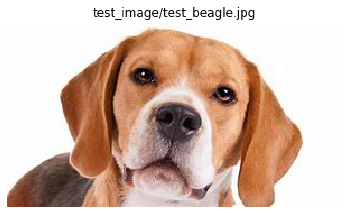

beagle


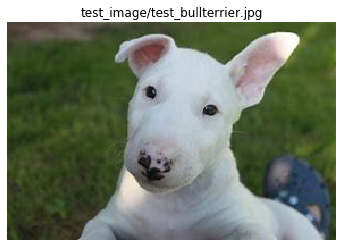

bullterrier


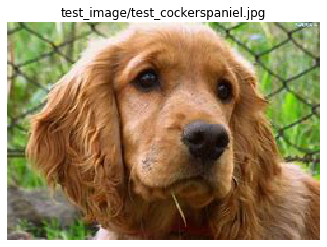

cockerspaniel


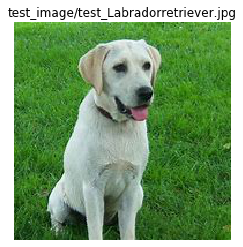

Labradorretriever


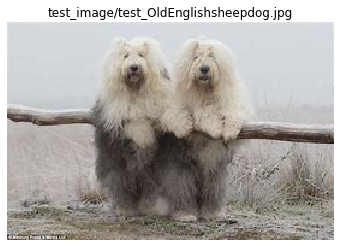

OldEnglishsheepdog


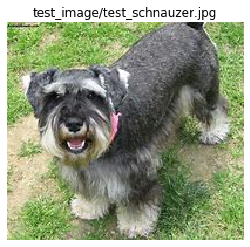

schnauzer


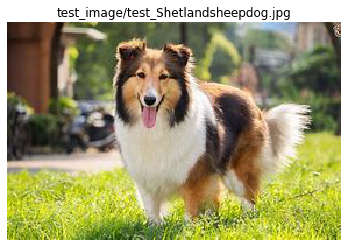

Shetlandsheepdog


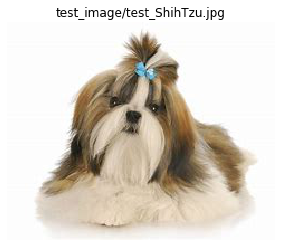

ShihTzu


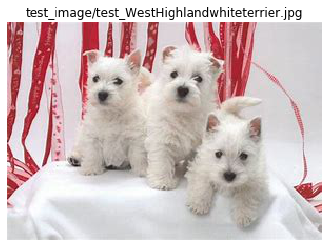

WestHighlandwhiteterrier


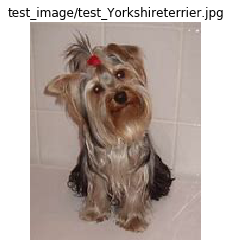

Yorkshireterrier


In [2]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, array_to_img, load_img
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

label = ['ShihTzu', 'beagle','bullterrier','Yorkshireterrier', 'schnauzer', 'WestHighlandwhiteterrier',
         'Labradorretriever', 'cockerspaniel', 'OldEnglishsheepdog', 'Shetlandsheepdog', ]
img_path = []
for file in os.listdir('test_image'):
    img_path.append(os.path.join('test_image/', file))

model = load_model('models/vgg16_dogs_classifier.h5')

for i in range(len(img_path)):
    img = load_img(img_path[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_path[i])
    plt.show()
    
    img = img.resize((224,224))
    img = img_to_array(img)/255.0
    img = np.expand_dims(img, 0)
    print(label[model.predict_classes(img)[0]])